In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


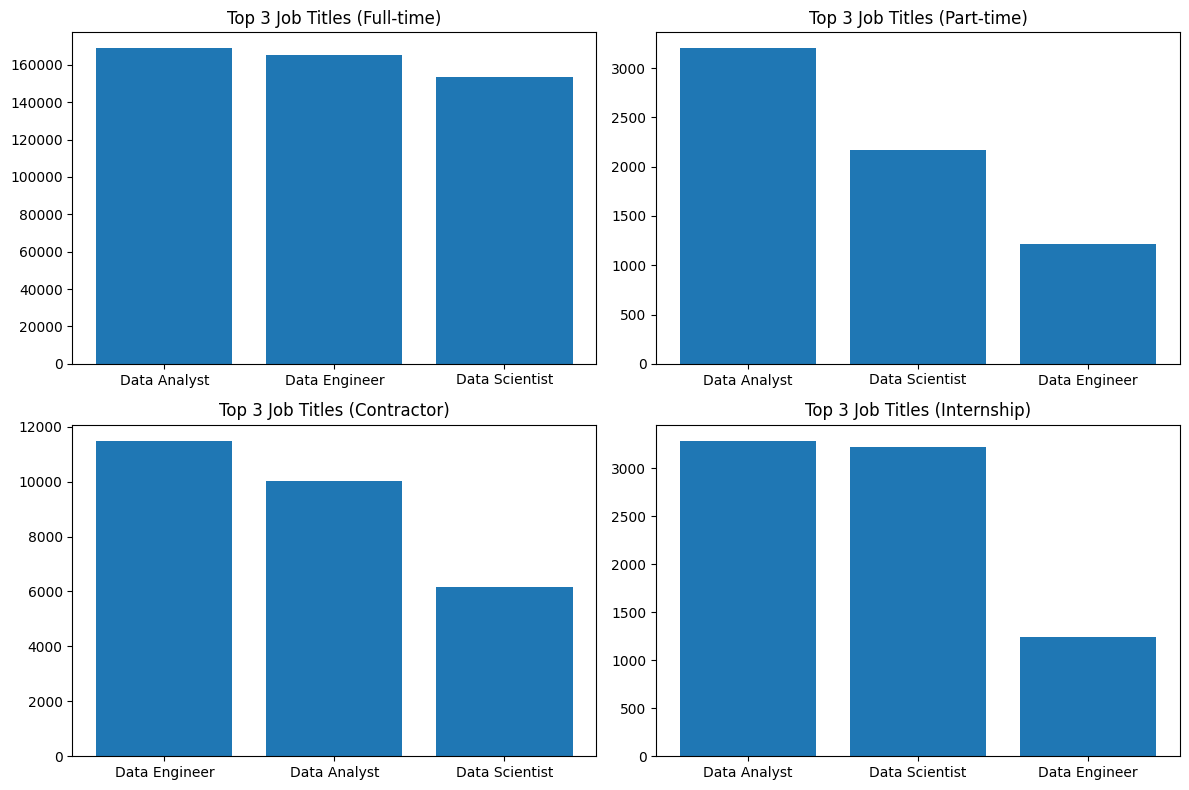

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')

fig.tight_layout()
plt.show()